In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

text = "the cat sat on the mat and the cat slept"
tokens = text.lower().split()
vocab = sorted(set(tokens))
word2idx = {word: i for i, word in enumerate(vocab)}
idx2word = {i: word for word, i in word2idx.items()}
vocab_size = len(vocab)

In [4]:
X = []
Y = []
for i in range(len(tokens) - 1):
    input_idx = word2idx[tokens[i]]
    target_idx = word2idx[tokens[i+1]]
    X.append(input_idx)
    Y.append(target_idx)

X = torch.tensor(X)
Y = torch.tensor(Y)

In [5]:
class Perceptron(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.linear = nn.Linear(vocab_size, vocab_size)

    def forward(self, x):
        return self.linear(x)

In [9]:
model = Perceptron(vocab_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

for epoch in range(100):
    one_hot_X = torch.eye(vocab_size)[X]
    outputs = model(one_hot_X)
    loss = criterion(outputs, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 1.4741
Epoch 20, Loss: 1.1730
Epoch 30, Loss: 0.9746
Epoch 40, Loss: 0.8391
Epoch 50, Loss: 0.7448
Epoch 60, Loss: 0.6774
Epoch 70, Loss: 0.6280
Epoch 80, Loss: 0.5907
Epoch 90, Loss: 0.5619
Epoch 100, Loss: 0.5391


In [7]:
def predict_next(word):
    if word not in word2idx:
        return None
    input_vector = torch.eye(vocab_size)[word2idx[word]].unsqueeze(0)
    output = model(input_vector)
    predicted_idx = torch.argmax(output, dim=1).item()
    return idx2word[predicted_idx]

print(predict_next("on"))

the


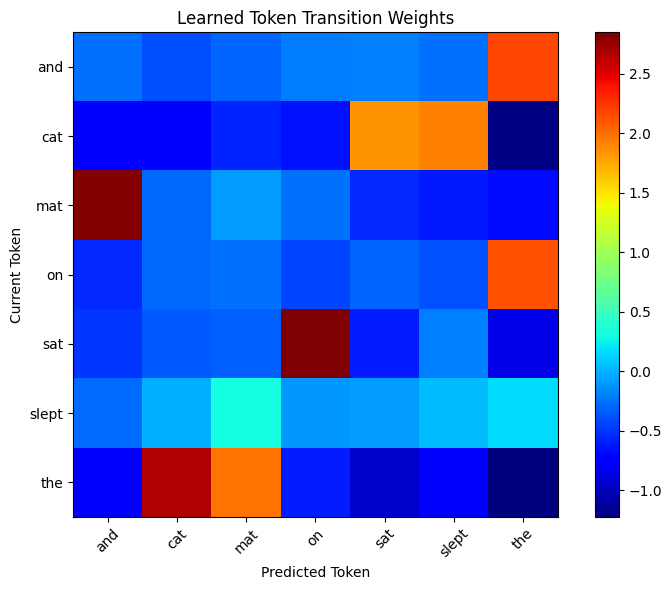

In [8]:
import matplotlib.pyplot as plt

with torch.no_grad():
    weight_matrix = model.linear.weight.data.t()

plt.figure(figsize=(8, 6))
plt.imshow(weight_matrix, cmap="jet")
plt.colorbar()
plt.xticks(ticks=range(vocab_size), labels=[idx2word[i] for i in range(vocab_size)], rotation=45)
plt.yticks(ticks=range(vocab_size), labels=[idx2word[i] for i in range(vocab_size)])
plt.title("Learned Token Transition Weights")
plt.xlabel("Predicted Token")
plt.ylabel("Current Token")
plt.tight_layout()
plt.show()